### Add new energies to database

In [1]:
import pandas as pd
import numpy as np
import ase.io as aio
from matplotlib import pyplot as plt
import glob

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
import bt_tools as bt

### Create dataset entry from raw data

In [2]:
def read_energy(bond_type, comp, row, system):
    if system == 'diatomics':
        path = f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/{row}/{system}_{bond_type}/{comp}_energy'
    elif system == 'fragments':
        path = f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/{row}/{system}_{bond_type}/{comp}_energy_relaxed'
    with open(path, 'r') as f:
        energy = float(f.readline().strip('\n'))
    return(energy)

def create_df_entry(bond_type, comp, row):
    """
    dataset entry for saturated diatomic
    """

    energy_diatomic = read_energy(bond_type, comp, row, 'diatomics')

    # get_frag names
    frag1, frag2 = uqm.fragmentize_smiles(comp)
    # get frag energies
    ef1 = read_energy(bond_type, frag1+frag1, row, 'fragments')
    ef2 = read_energy(bond_type, frag2+frag2, row, 'fragments')
    # calculate bfe
    bfe = energy_diatomic-(ef1+ef2)

    # structural information
    atoms = aio.read(f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/{row}/diatomics_{bond_type}/{comp}_opt.xyz')
    Z1 = atoms.get_atomic_numbers()[0]
    Z2 = atoms.get_atomic_numbers()[1]
    d = atoms.get_distance(0,1)
    
    # make dataset entry
    entry = {'smiles':comp, 'Z1':Z1, 'Z2':Z2, 'd':d, 'energy':energy_diatomic, 'bfe':bfe}
    return(entry)

In [4]:
compounds = ['[Li]C', '[Li]N', '[Li]O', '[Li]F', '[BeH]C', '[BeH]N', '[BeH]O', '[BeH]F']
row = 'row_2'
bond_type = 'single'
c = '[Li]O'
for c in compounds:
    create_df_entry(bond_type, c, row)

In [5]:
create_df_entry(bond_type, c, row)

{'smiles': '[BeH]F',
 'Z1': 4,
 'Z2': 9,
 'd': 1.3707959541143764,
 'energy': -115.17317576586302,
 'bfe': -0.2753610551262824}

In [6]:
-115.17317576586302-(-15.223815567924719+-99.67399914281202)

-0.2753610551262824

In [7]:
# compounds for which new entry shall be created

# compounds = ['[BH2][BH2]', '[BH2]C', '[BH2]N', '[BH2]O', '[BH2]F']
# row = 'row_2'
# bond_type = 'single'

# compounds = ['[AlH2][AlH2]','[AlH2][SiH3]', '[AlH2]P', '[AlH2]S', '[AlH2]Cl']
# row = 'row_3'
# bond_type = 'single'

compounds = ['[Li]C', '[Li]N', '[Li]O', '[Li]F', '[BeH]C', '[BeH]N', '[BeH]O', '[BeH]F']
row = 'row_2'
bond_type = 'single'


df = pd.DataFrame()
for c in compounds:
    df = df.append(create_df_entry(bond_type, c, row), ignore_index=True)

In [8]:
df

,Z1,Z2,bfe,d,energy,smiles
0,3.0,6.0,-0.072022,1.962869,-47.336002,[Li]C
1,3.0,7.0,-0.110583,1.723303,-63.410044,[Li]N
2,3.0,8.0,-0.156868,1.570765,-83.307236,[Li]O
3,3.0,9.0,-0.206869,1.559862,-107.347917,[Li]F
4,4.0,6.0,-0.151642,1.675733,-55.172389,[BeH]C
5,4.0,7.0,-0.194615,1.499926,-71.250843,[BeH]N
6,4.0,8.0,-0.231486,1.382685,-91.138621,[BeH]O
7,4.0,9.0,-0.275361,1.370796,-115.173176,[BeH]F


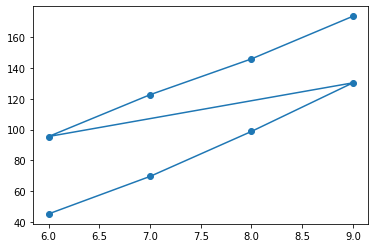

In [9]:
plt.plot(np.array(df['Z2']), -630*np.array(df['bfe']),'-o')

### Append dataset

In [17]:
data = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/energies_homolytic.csv')
data_copy = data.copy()
data_copy = data_copy.append(df)
data_copy

,smiles,Z1,Z2,d,energy,bfe
0,CC,6.0,6.0,1.518780,-79.750204,-0.156342
1,CN,6.0,7.0,1.453213,-95.777291,-0.147947
2,CO,6.0,8.0,1.409122,-115.637262,-0.157011
3,CF,6.0,9.0,1.375981,-139.653810,-0.182880
4,NN,7.0,7.0,1.414972,-111.784922,-0.120096
...,...,...,...,...,...,...
3,[Li]F,3.0,9.0,1.559862,-107.347917,-0.206869
4,[BeH]C,4.0,6.0,1.675733,-55.172389,-0.151642
5,[BeH]N,4.0,7.0,1.499926,-71.250843,-0.194615
6,[BeH]O,4.0,8.0,1.382685,-91.138621,-0.231486


In [20]:
data.loc[data['Z1']==4]

,smiles,Z1,Z2,d,energy,bfe
97,[BeH]C,4.0,6.0,1.675733,-55.172389,-0.151642
98,[BeH]N,4.0,7.0,1.499926,-71.250843,-0.194615
99,[BeH]O,4.0,8.0,1.382685,-91.138621,-0.231486
100,[BeH]F,4.0,9.0,1.370796,-115.173176,-0.275361


In [18]:
data

,smiles,Z1,Z2,d,energy,bfe
0,CC,6.0,6.0,1.518780,-79.750204,-0.156342
1,CN,6.0,7.0,1.453213,-95.777291,-0.147947
2,CO,6.0,8.0,1.409122,-115.637262,-0.157011
3,CF,6.0,9.0,1.375981,-139.653810,-0.182880
4,NN,7.0,7.0,1.414972,-111.784922,-0.120096
...,...,...,...,...,...,...
96,[Li]F,3.0,9.0,1.559862,-107.347917,-0.206869
97,[BeH]C,4.0,6.0,1.675733,-55.172389,-0.151642
98,[BeH]N,4.0,7.0,1.499926,-71.250843,-0.194615
99,[BeH]O,4.0,8.0,1.382685,-91.138621,-0.231486


In [16]:
# save data
data_copy.to_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/energies_homolytic.csv', index = False)

### isodesmic energies

In [ ]:
isodesmic_energies = dict()
for i in range(len(smiles)):
    # decompose smiles in fragments
    f1, f2 = uqm.fragmentize_smiles(smiles[i])
    # read fragment energies
    Z = Z1[i]
    if Z <= 9:
        row = 'row_2'
    elif Z >= 14 and Z <= 17:
        row = 'row_3'
    elif Z >= 32 and Z <= 35:
        row = 'row_4'
    
    energy_frags = 0
    for frag in [f1, f2]:
        if frag == '[SiH3]':
            frag = '[SiH4]'
        elif frag == '[GeH3]':
            frag = '[GeH4]'
        elif frag == '[AsH2]':
            frag = '[AsH3]'
        elif frag == '[SeH]':
            frag = '[SeH2]'
        
        file = f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/{row}/fragments_single/saturated/{frag}_energy'
        with open(file, 'r') as f:
            energy_frags += float(f.readline().strip('\n'))
            
        # calculate bfe and store results in dict
        energy_diatomic = data.loc[data['smiles'] == smiles[i], 'energy'].item()
        isodesmic_energies[smiles[i]] = (energy_diatomic + energy_H2) - energy_frags

### Calculate isodesmic reaction energies

In [ ]:
# define smiles to update
smiles = list(data.loc[(data['Z1'] <= 9) & (data['Z2'] <= 9) | (data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17) | (data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35), 'smiles'])
Z1 = list(data.loc[(data['Z1'] <= 9) & (data['Z2'] <= 9) | (data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17) | (data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35), 'Z1'])

In [ ]:
isodesmic_energies = dict()
for i in range(len(smiles)):
    # decompose smiles in fragments
    f1, f2 = uqm.fragmentize_smiles(smiles[i])
    # read fragment energies
    Z = Z1[i]
    if Z <= 9:
        row = 'row_2'
    elif Z >= 14 and Z <= 17:
        row = 'row_3'
    elif Z >= 32 and Z <= 35:
        row = 'row_4'
    
    energy_frags = 0
    for frag in [f1, f2]:
        if frag == '[SiH3]':
            frag = '[SiH4]'
        elif frag == '[GeH3]':
            frag = '[GeH4]'
        elif frag == '[AsH2]':
            frag = '[AsH3]'
        elif frag == '[SeH]':
            frag = '[SeH2]'
        
        file = f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/{row}/fragments_single/saturated/{frag}_energy'
        with open(file, 'r') as f:
            energy_frags += float(f.readline().strip('\n'))
            
        # calculate bfe and store results in dict
        energy_diatomic = data.loc[data['smiles'] == smiles[i], 'energy'].item()
        isodesmic_energies[smiles[i]] = (energy_diatomic + energy_H2) - energy_frags

In [ ]:
# add to database
data['bfe isodesmic'] = [np.nan]*len(data['smiles'])

for s in smiles:
    data.loc[data['smiles'] == s, 'bfe isodesmic'] = isodesmic_energies[s]
    
data.to_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/all_energies.csv', index=False)